In [1]:
getwd()

[1] "/users/genomics/xoel/codebases/cortical_disorders2"

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Motif annotations

In [3]:
data_folder <- 'raw/HumanTFs/'
dir.create(data_folder, showWarnings = F, recursive = F)

### Position weight matrix similarities

In [4]:
pwm_url <- 'http://humantfs.ccbr.utoronto.ca/download/v_1.01/MotifSimMatrix.csv'
pwm_file <- paste0(data_folder, basename(pwm_url))

In [6]:
pwmsim <- read.csv(pwm_file, row.names=1)
head(pwmsim)

,HKR1.RCADE,M00140_1.94d,M00142_1.94d,M00143_1.94d,M00144_1.94d,M00146_1.94d,M00218_1.94d,M00224_1.94d,M00226_1.94d,M00238_1.94d,⋯,ZNF823.RCADE,ZNF84.RCADE,ZNF846.MEME,ZNF85.RCADE,ZNF860.RCADE,ZNF879.RCADE,ZNF880.RCADE,ZNF891.RCADE,ZNF90.RCADE,ZNF93.RCADE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HKR1.RCADE,1.0000000,-0.1205384,-0.1470846,-0.1839939,-0.0874977,-0.1598063,0.01231919,-0.03173032,-0.05065808,0.009363305,⋯,0.33359264,0.18570610,0.2626297,0.04678321,0.3806216,-0.1262741,0.41023868,0.07797324,0.031625798,0.08367354
M00140_1.94d,-0.1205384,1.0000000,0.7220095,0.5926901,0.3816576,0.4978678,-0.11790191,-0.02236426,0.06410130,-0.159652205,⋯,-0.02685204,-0.05216181,-0.1603382,-0.05923192,-0.1351084,0.3712433,-0.07015957,-0.17042515,0.042244879,-0.15868964
M00142_1.94d,-0.1470846,0.7220095,1.0000000,0.6496097,0.3522965,0.5652399,-0.13615188,-0.01381570,0.06182573,-0.191658062,⋯,-0.02435123,-0.06816143,-0.1890881,-0.03798403,-0.1622554,0.4054459,-0.08010813,-0.20359437,0.050596492,-0.18094249
M00143_1.94d,-0.1839939,0.5926901,0.6496097,1.0000000,0.6789107,0.9488681,-0.17104766,0.04653607,0.03496562,-0.233997630,⋯,-0.04975524,-0.10284654,-0.2329817,-0.03550612,-0.2116228,0.4256584,-0.10713125,-0.23210549,0.021433214,-0.19273299
M00144_1.94d,-0.0874977,0.3816576,0.3522965,0.6789107,1.0000000,0.7048491,-0.08860020,0.06795094,-0.01997276,-0.128169688,⋯,-0.02696915,-0.07612519,-0.1277775,-0.04804096,-0.1074333,0.2547165,-0.05658531,-0.12316486,0.002065896,-0.10677443
M00146_1.94d,-0.1598063,0.4978678,0.5652399,0.9488681,0.7048491,1.0000000,-0.14187556,0.04765378,0.03650286,-0.198027815,⋯,-0.05920977,-0.10288956,-0.1967332,-0.01107241,-0.1793852,0.3456363,-0.09689129,-0.19962379,0.009267749,-0.16559353


### Motif database

In [7]:
tfmotif_url <- 'http://humantfs.ccbr.utoronto.ca/download/v_1.01/Human_TF_MotifList_v_1.01.csv'
tfmotif_file <- paste0(data_folder, basename(tfmotif_url))

In [8]:
motif_db <- read.csv(tfmotif_file)
head(motif_db)
dim(motif_db)

,Ensembl.ID,HGNC.symbol,Motif.evidence,Motif.ID,Motif.type,Motif.source,CIS.BP.ID,Best.Motif.s....Figure.2A.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,ENSG00000267281,AC023509.3,"Inferred - ATF7 (100% AA Identity, Homo sapiens)",ATF7_eDBD_HT-SELEX,HT-SELEX,Yin2017,M08490_1.94d,TRUE
2,ENSG00000267281,AC023509.3,"Inferred - ATF7 (100% AA Identity, Homo sapiens)",ATF7_eDBD_Methyl-HT-SELEX,Methyl-HT-SELEX,Yin2017,M08491_1.94d,NA
3,ENSG00000267281,AC023509.3,"Inferred - Atf7 (98% AA Identity, Mus musculus)",3T3L1-Atf7_GSE56872,Misc,HOMER,M06975_1.94d,NA
4,ENSG00000264668,AC138696.1,"Inferred - ZFP41 (100% AA Identity, Homo sapiens)",ZFP41_FL_HT-SELEX,HT-SELEX,Yin2017,M09315_1.94d,TRUE
5,ENSG00000264668,AC138696.1,"Inferred - ZFP41 (100% AA Identity, Homo sapiens)",ZFP41_FL_Methyl-HT-SELEX,Methyl-HT-SELEX,Yin2017,M09316_1.94d,NA
6,ENSG00000106546,AHR,Direct,AHR_si,Misc,HocoMoco,M06439_1.94d,NA


[1] 26990     8

In [9]:
motif_db$CIS.BP.ID.clean <- ifelse(
    grepl(motif_db$CIS.BP.ID, pattern='_1.94d', fixed=T),
    sapply(motif_db$CIS.BP.ID, function(x){strsplit(x, split='_1.94d', fixed=T)[[1]][1]}),
    NA)

In [10]:
apply(motif_db, 2, function(x) sum(unique(x) %in% rownames(pwmsim)))
apply(motif_db, 2, function(x) all(unique(x) %in% rownames(pwmsim)))

Ensembl.ID                HGNC.symbol 
                         0                          0 
            Motif.evidence                   Motif.ID 
                         0                          0 
                Motif.type               Motif.source 
                         0                          0 
                 CIS.BP.ID Best.Motif.s....Figure.2A. 
                      1402                          0 
           CIS.BP.ID.clean 
                         0

Ensembl.ID                HGNC.symbol 
                     FALSE                      FALSE 
            Motif.evidence                   Motif.ID 
                     FALSE                      FALSE 
                Motif.type               Motif.source 
                     FALSE                      FALSE 
                 CIS.BP.ID Best.Motif.s....Figure.2A. 
                     FALSE                      FALSE 
           CIS.BP.ID.clean 
                     FALSE

In [11]:
motif_db <- motif_db[motif_db$CIS.BP.ID %in% rownames(pwmsim),]
dim(motif_db)

[1] 3868    9

### TF database

In [12]:
tfinfo_url <- 'http://humantfs.ccbr.utoronto.ca/download/v_1.01/DatabaseExtract_v_1.01.csv'
tfinfo_file <- paste0(data_folder, basename(tfinfo_url))

In [13]:
tf_db <- read.csv(tfinfo_file, row.names=1)
head(tf_db)

,Ensembl.ID,HGNC.symbol,DBD,Is.TF.,TF.assessment,Binding.mode,Motif.status,Final.Notes,Final.Comments,Interpro.ID.s.,⋯,CisBP.considers.it.a.TF.,TFCat.classification,Is.a.GO.TF.,Initial.assessment,Curator.1,Curator.2,TFclass.considers.it.a.TF.,Go.Evidence,Pfam.Domains..By.ENSP.ID.,Is.C2H2.ZF.KRAB..
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,ENSG00000137203,TFAP2A,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,None,None,IPR008121;IPR013854,⋯,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Binding; Transactivation_PMIDS:11522791;15475956,Yes,"1a1, Direct HQ evidence",Sam Lambert,Yimeng Yin,Yes,"$#ENSG00000137203#GO:0000981#sequence-specific DNA binding RNA polymerase II transcription factor activity#IDA - PMID:7555706$#ENSG00000137203#GO:0000982#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IDA - PMID:21084835$#ENSG00000137203#GO:0001077#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IDA - PMID:11278550, PMID:20808827$#ENSG00000137203#GO:0001078#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IDA - PMID:11278550, PMID:20066163, PMID:9520389",$#ENSP00000368928#ENSG00000137203#ENST00000379608#AP-2#$#ENSP00000368933#ENSG00000137203#ENST00000379613#AP-2#$#ENSP00000417495#ENSG00000137203#ENST00000466073#AP-2#$#ENSP00000417735#ENSG00000137203#ENST00000461628#AP-2#$#ENSP00000418391#ENSG00000137203#ENST00000465858#AP-2#$#ENSP00000419696#ENSG00000137203#ENST00000475264#AP-2#,False
1,ENSG00000008196,TFAP2B,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,None,None,IPR008122;IPR013854,⋯,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Binding; Transactivation_PMIDS:7555706,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,"$#ENSG00000008196#GO:0000981#sequence-specific DNA binding RNA polymerase II transcription factor activity#IDA - PMID:7555706$#ENSG00000008196#GO:0000983#RNA polymerase II core promoter sequence-specific DNA binding transcription factor activity#ISS - GO_REF:0000024$#ENSG00000008196#GO:0001077#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IEA - GO_REF:0000019$#ENSG00000008196#GO:0003700#sequence-specific DNA binding transcription factor activity#IDA - PMID:11505339, PMID:12169688, PMID:16373396",$#ENSP00000377265#ENSG00000008196#ENST00000393655#AP-2#$#ENSP00000342252#ENSG00000008196#ENST00000344788#AP-2#,False
2,ENSG00000087510,TFAP2C,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,None,None,IPR008123;IPR013854,⋯,Yes,No,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,$#ENSG00000087510#GO:0001077#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IDA - PMID:11278550$#ENSG00000087510#GO:0001078#RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor a#IDA - PMID:11278550$#ENSG00000087510#GO:0003700#sequence-specific DNA binding transcription factor activity#TAS - PMID:9113991,$#ENSP00000201031#ENSG00000087510#ENST00000201031#AP-2#$#ENSP00000390857#ENSG00000087510#ENST00000416606#AP-2#,False
3,ENSG00000008197,TFAP2D,AP-2,Yes,Known motif,Monomer or homomultimer,In vivo/Misc source,Only known motifs are from Transfac or HocoMoco - origin is uncertain,Binds the same GCCTGAGGC sequence as the other AP-2s (PMID: 24789576),IPR013854;,⋯,Yes,No,Yes,"2a1, Lower confidence direct evidence",Arttu Jolma,Sam Lambert,Yes,$#ENSG00000008197#GO:0000981#sequence-specific DNA binding RNA polymerase II transcription factor activity#IBA - GO_REF:0000033,$#ENSP00000008391#ENSG00000008197#ENST00000008391#AP-2#,False
4,ENSG00000116819,TFAP2E,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,None,None,IPR013854;,⋯,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin

### cis motif database

In [14]:
cisdb_url <- 'https://resources.aertslab.org/cistarget/motif_collections/v10nr_clust_public/snapshots/motifs-v10-nr.hgnc-m0.00001-o0.0.tbl'
cisdb_file <- paste0(data_folder, basename(cisdb_url))

In [15]:
cis_db <- data.table::fread(cisdb_file, sep='\t') 
gsub(pattern='#', replacement='', colnames(cis_db), fixed=T) -> colnames(cis_db)

In [16]:
cis_db <- subset(unique(cis_db[,c('motif_id', 'motif_name', 'source_name', 'similar_motif_id', 'gene_name')]),grepl('cisbp', x=similar_motif_id, fixed=T))

In [17]:
cis_db$similar_motif_id.clean <- gsub(pattern='cisbp__', replacement='', cis_db$similar_motif_id, fixed=T)

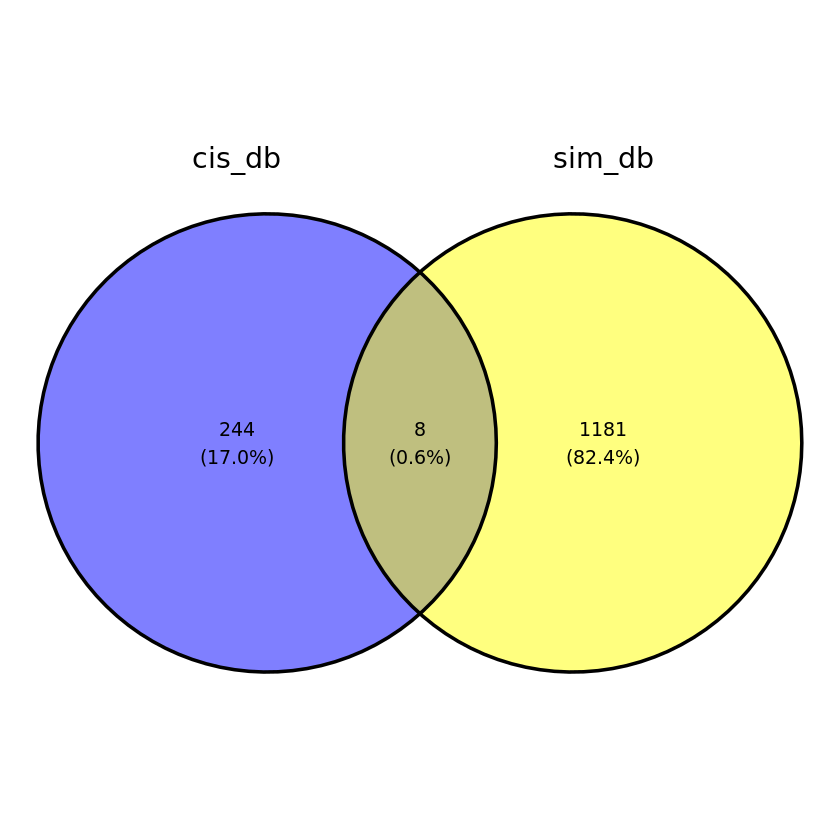

In [18]:
ggvenn::ggvenn(list(
    cis_db=unique(cis_db$similar_motif_id.clean),
    sim_db=unique(motif_db$CIS.BP.ID.clean)))

# TFs of interest

In [19]:
regulons <- read.csv('results/RCT_peaks/cisTarget_regulons.csv') %>% 
    group_by(geneSet, Core) %>% 
    summarise(
        motifs = paste0(unique(all.motifs), collapse='; '),
        Targets = paste0(unique(Target), collapse=', '))

`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.


In [20]:
regulons <- read.csv('results/RCT_diseases/cisTarget_regulons.csv') %>% 
    group_by(geneSet, Core) %>% 
    summarise(
        motifs = paste0(unique(all.motifs), collapse='; '),
        Targets = paste0(unique(Target), collapse=', '))

`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.


In [21]:
regulons[1:5,-4]

geneSet,Core,motifs
<chr>,<chr>,<chr>
ASD,ARNT2,metacluster_66.4
ASD,CHD1,swissregulon__hs__CHD1
ASD,EGR3,metacluster_131.7; transfac_pro__M00807; metacluster_131.7; transfac_pro__M00807
ASD,EP300,tfdimers__MD00537
ASD,GLIS1,metacluster_23.9


### Get motifs of interest and order

In [22]:
# subset motif annotation to motifs in similarity matrix
motif_db.in_sim <- subset(motif_db, CIS.BP.ID %in% rownames(pwmsim))

In [23]:
# Get a list that we can subscript to obtain lists of motifs
motifsPerGene <- lapply(split(motif_db.in_sim$CIS.BP.ID, motif_db.in_sim$HGNC.symbol), unique)

In [24]:
# Get vector of cores with valid motifs
coreSel <- unique(subset(regulons, Core %in% names(motifsPerGene))$Core)

In [25]:
# Get a vector of unique, valid motifs from regulon TFs
motifsPerGeneSel <- motifsPerGene[coreSel]
motifsSel <- unique(unlist(motifsPerGeneSel))

In [26]:
# subset similarity matrix
pwmSel <- pwmsim[motifsSel, motifsSel]

In [27]:
# Get order of motifs based on clustering
motifsOrder <- rownames(pwmSel)[hclust(dist(pwmSel), method='ward.D2')$order]

### Get families of genes of interest

In [28]:
families <- unique(subset(tf_db, HGNC.symbol %in% coreSel)[,c('HGNC.symbol', 'DBD')])
any(duplicated(families$HGNC.symbol))
families <- setNames(families$DBD, families$HGNC.symbol)

[1] FALSE

### Create dataframe to plot

In [29]:
# Unique combinations of cores and motifs for naming the axes
simplot.df <- subset(regulons, Core %in% coreSel)[,-c(3,4)] %>% ungroup() %>%
    group_by(geneSet, Core) %>%
    reframe(motif=motifsPerGeneSel[[Core]], 
              motifIdx=if(length(motifsPerGeneSel[[Core]])>1) {as.character(1:length(motifsPerGeneSel[[Core]]))} else {''},
              GeneMotif = paste(Core, motifsPerGeneSel[[Core]], sep='__'),
              GeneIdx = paste0(Core, if(length(motifsPerGeneSel[[Core]])>1) { paste0(' (', 1:length(motifsPerGeneSel[[Core]]),')')} else {''}),
              family=families[Core]
             )

In [30]:
# Expand the similarity matrix to be subscripted using geneMotifID rather than the motif
pwmSelExpand <- pwmSel[simplot.df$motif, simplot.df$motif]
rownames(pwmSelExpand) <- simplot.df$GeneMotif
colnames(pwmSelExpand) <- simplot.df$GeneMotif

similarities <- pwmSelExpand %>% mutate(GeneMotif=simplot.df$GeneMotif) 

In [31]:
# Merge combinations with similarities and melt to long dataframe
simplot.mat <- merge(simplot.df, similarities, by='GeneMotif', all=T) 
simplot.df <- reshape2::melt(simplot.mat, id.vars=colnames(simplot.df), 
                   value.name='similarity', variable.name='compared')

colnames(simplot.mat)[-c(1:7)] <- plyr::mapvalues(warn_missing = F, x = colnames(simplot.mat)[-c(1:7)], from = simplot.df$GeneMotif,  to = simplot.df$GeneIdx)

rownames(simplot.mat) <- simplot.mat$GeneIdx

In [32]:
simplot.mat

,GeneMotif,geneSet,Core,motif,motifIdx,GeneIdx,family,ARNT2 (1),ARNT2 (2),ARNT2 (3),⋯,KLF6 (9),SP4 (1),SP4 (2),SP4 (3),SP4 (4),SP4 (5),SP4 (6),SP4 (7),SP4 (8),SP4 (9)
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARNT2 (2),ARNT2__M00226_1.94d,ASD,ARNT2,M00226_1.94d,2,ARNT2 (2),bHLH,0.357098467,1.000000000,0.339365345,⋯,-0.072811864,-0.039703236,0.020710363,-0.022867607,-0.009068342,-0.057446606,-0.05745521,-0.0625931319,-0.030194371,-0.048911725
ARNT2 (4),ARNT2__M00267_1.94d,ASD,ARNT2,M00267_1.94d,4,ARNT2 (4),bHLH,0.864167417,0.382559055,0.896749027,⋯,-0.008693263,0.004013852,0.088356071,-0.003695618,0.008782618,-0.013501810,0.02288467,0.0049563926,0.009379767,-0.018244948
ARNT2 (1),ARNT2__M08469_1.94d,ASD,ARNT2,M08469_1.94d,1,ARNT2 (1),bHLH,1.000000000,0.357098467,0.941887089,⋯,-0.022429811,0.014919446,0.115747034,0.004855234,0.017860123,-0.009348089,0.04562057,-0.0157491835,0.030645448,-0.003407740
ARNT2 (3),ARNT2__M08470_1.94d,ASD,ARNT2,M08470_1.94d,3,ARNT2 (3),bHLH,0.941887089,0.339365345,1.000000000,⋯,-0.001537469,0.019252436,0.107226812,0.003071236,0.021546467,-0.004800203,0.04676242,-0.0024789004,0.031444184,-0.007763295
CTCF (2),CTCF__M05451_1.94d,DD,CTCF,M05451_1.94d,2,CTCF (2),C2H2 ZF,0.027011839,-0.065599908,0.044271373,⋯,0.210395156,0.144956025,0.101992730,0.117350535,0.108128746,0.187056932,0.24512447,0.2948179352,0.193428016,0.239961549
CTCF (1),CTCF__M10351_1.94d,DD,CTCF,M10351_1.94d,1,CTCF (1),C2H2 ZF,0.051190006,-0.053257826,0.067289886,⋯,0.247585797,0.169516577,0.134270229,0.144393804,0.161020783,0.215482746,0.29521425,0.3235082624,0.232924510,0.273136547
DLX2 (2),DLX2__M08556_1.94d,FCDandmTOR,DLX2,M08556_1.94d,2,DLX2 (2),Homeodomain,-0.059860777,0.095110323,-0.062268385,⋯,-0.066801790,-0.035654244,-0.055375133,-0.042100082,-0.034922226,-0.052997572,-0.08284051,-0.0577422465,-0.054827765,-0.050854610
DLX2 (1),DLX2__M08560_1.94d,FCDandmTOR,DLX2,M08560_1.94d,1,DLX2 (1),Homeodomain,-0.083655719,0.154171495,-0.085878705,⋯,-0.066537868,-0.029128008,-0.058235602,-0.038801772,-0.024231293,-0.051630364,-0.08156683,-0.0532138990,-0.052322609,-0.049943418
DLX2 (3),DLX2__M08569_1.94d,FCDandmTOR,DLX2,M08569_1.94d,3,DLX2 (3),Homeodomain,-0.073044386,0.118308967,-0.076179537,⋯,-0.064153688,-0.029506725,-0.056869668,-0.038072883,-0.025948530,-0.050443922,-0.08093795,-0.0526075516,-0.050513312,-0.048156236


In [41]:
fam.colors <- structure(ggsci::pal_d3(palette = 'category20')(length(unique(simplot.df$family))), names=unique(simplot.df$family))


In [42]:
library(ComplexHeatmap)

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


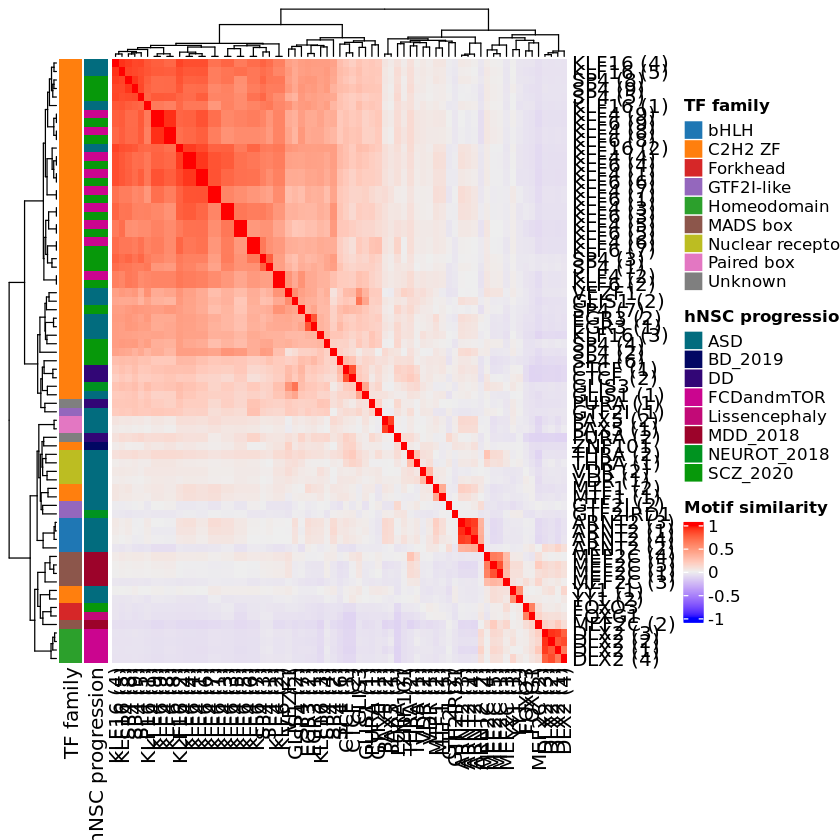

In [43]:
Heatmap(
    name='Motif similarity', simplot.mat[,-c(1:7)],
    left_annotation = rowAnnotation(
        `TF family`=simplot.mat$family,
        `hNSC progression`=simplot.mat$geneSet, 
        col = list(
            # `hNSC progression` = meta.colors$PeakSample,
                   `TF family` = fam.colors
        )))

# Plot the dataframe

In [116]:
load('~/codebases/cortical_disorders2/data/graphical.rda', verbose=T)

Loading objects:
  GeneAnnotation
  meta.colors
  facets


In [117]:
figsize <- function(x,y){
    options(repr.plot.width=x, repr.plot.height=y)
}

In [118]:
library(ggplot2)
library(ggpubr)
library(ggsci)
library(viridis)

In [119]:
sim.plot <- ggplot(simplot.df) + 
    geom_tile(aes(x=compIdxFct, y=GeneIdxFct, fill=similarity)) +
    scale_fill_viridis(option='cividis') + 
    theme_pubr(legend='top') +
    labs(x='Gene and motif', y='', fill='Motif PWM similarity') +
    labs_pubr() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))


In [120]:
figsize(20,20)
sim.plot

ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'compIdxFct' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error =

In [121]:
sam.plot <- ggplot(unique(simplot.df[,c('geneSet', 'GeneIdxFct')])) + 
    geom_tile(aes(x='Peak sample', 
                  y=GeneIdxFct, 
                  fill=geneSet)) +
    scale_fill_manual(values=meta.colors[['PeakSample']]) + 
    labs(x='', y='', fill='Motif PWM similarity') +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), axis.ticks.x=element_blank())

ERROR: Error in `[.data.frame`(simplot.df, , c("geneSet", "GeneIdxFct")): undefined columns selected


In [122]:
figsize(2,20)
sam.plot

ERROR: Error in eval(expr, envir, enclos): object 'sam.plot' not found


In [123]:
fam.plot <- ggplot(unique(simplot.df[,c('family', 'GeneIdxFct')])) + 
    geom_tile(aes(x='Family', 
                  y=GeneIdxFct, 
                  fill=family)) +
    labs(x='', y='Gene and motif', fill='TF family') +
    scale_fill_d3('category20b') +
    theme_pubr(legend = 'left') +
    labs_pubr() +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), axis.ticks.x=element_blank())

ERROR: Error in `[.data.frame`(simplot.df, , c("family", "GeneIdxFct")): undefined columns selected


In [124]:
figsize(4,20)
fam.plot

ERROR: Error in eval(expr, envir, enclos): object 'fam.plot' not found


In [125]:
comb.plot <- cowplot::plot_grid(
    fam.plot, 
    sam.plot + theme(axis.text.y= element_blank()), 
    sim.plot + theme(axis.text.y= element_blank()), 
    
    nrow=1, align='h', axis = 'tb',
    rel_widths=c(3.5,1,18))

ERROR: Error in cowplot::plot_grid(fam.plot, sam.plot + theme(axis.text.y = element_blank()), : object 'fam.plot' not found


In [126]:
figsize(25,22)
comb.plot

ERROR: Error in eval(expr, envir, enclos): object 'comb.plot' not found


In [ ]:
pdf('results/RCT_peaks/plots/cores_motifSimilarity.pdf', width=25, height=22, useDingbats = F)
plot(comb.plot)
dev.off()

# Functionalize

In [45]:
load('~/codebases/cortical_disorders2/data/graphical.rda', verbose=T)

Loading objects:
  GeneAnnotation
  meta.colors
  facets


In [46]:
library(ggplot2)
library(ggpubr)
library(ggsci)
library(viridis)

Loading required package: viridisLite



In [47]:
figsize <- function(x,y){
    options(repr.plot.width=x, repr.plot.height=y)
}

In [49]:
motifSimPlot <- function(genes){
    # Get a vector of unique, valid motifs from regulon TFs
    genes <- genes[genes%in%names(motifsPerGene)]
    motifsPerGeneSel <- motifsPerGene[genes]
    motifsSel <- unique(unlist(motifsPerGeneSel))
    
    # subset similarity matrix
    pwmSel <- pwmsim[motifsSel, motifsSel]    
    
    
    families <- unique(subset(tf_db, HGNC.symbol %in% genes)[,c('HGNC.symbol', 'DBD')])
    any(duplicated(families$HGNC.symbol))
    families <- setNames(families$DBD, families$HGNC.symbol)
    
    # Get a vector of unique, valid motifs from regulon TFs
    motifsPerGeneSel <- motifsPerGene[coreSel]
    motifsSel <- unique(unlist(motifsPerGeneSel))
    

    # Unique combinations of cores and motifs for naming the axes
    simplot.df <- subset(regulons, Core %in% genes)[,-c(3,4)] %>% 
        group_by(Core) %>%
        summarise(geneSet=geneSet, 
                  motif=motifsPerGeneSel[[Core]], 
                  motifIdx=if(length(motifsPerGeneSel[[Core]])>1) {as.character(1:length(motifsPerGeneSel[[Core]]))} else {''},
                  GeneMotif = paste(Core, motifsPerGeneSel[[Core]], sep='__'),
                  GeneIdx = paste0(Core, if(length(motifsPerGeneSel[[Core]])>1) {paste0(
                      ' (', 1:length(motifsPerGeneSel[[Core]]), ')')} else {''}),
                  family=families[Core]
                 )

    print(simplot.df)
    # Expand the similarity matrix to be subscripted using geneMotifID rather than the motif
    pwmSelExpand <- pwmSel[simplot.df$motif, simplot.df$motif]
    rownames(pwmSelExpand) <- simplot.df$GeneMotif
    colnames(pwmSelExpand) <- simplot.df$GeneMotif

    similarities <- pwmSelExpand %>% mutate(GeneMotif=simplot.df$GeneMotif) 

    # Merge combinations with similarities and melt to long dataframe
    simplot.mat <- merge(simplot.df, similarities, by='GeneMotif', all=T) 
    colnames(simplot.mat)[-c(1:7)] <- plyr::mapvalues(warn_missing = F, 
                                                      x = colnames(simplot.mat)[-c(1:7)],
                                                      from = simplot.df$GeneMotif,  
                                                      to = simplot.df$GeneIdx)
    rownames(simplot.mat) <- simplot.mat$GeneIdx

    # Heatmap
    ht <- Heatmap(
        row_names_gp = gpar(fontsize = 7), column_names_gp = gpar(fontsize = 7),
        row_names_side = 'right',
        name='Motif similarity', simplot.mat[,-c(1:7)],
        right_annotation = rowAnnotation(
            `TF family`=simplot.mat$family,
            `hNSC progression`=simplot.mat$geneSet,
            col = list(
                # `hNSC progression` = meta.colors$PeakSample,
                `TF family` = fam.colors
            )))
    return(ht)
}

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.


# A tibble: 71 × 7
# Groups:   Core [23]
   Core  geneSet    motif        motifIdx GeneMotif           GeneIdx   family  
   <chr> <chr>      <chr>        <chr>    <chr>               <chr>     <chr>   
 1 ARNT2 ASD        M08469_1.94d 1        ARNT2__M08469_1.94d ARNT2 (1) bHLH    
 2 ARNT2 ASD        M00226_1.94d 2        ARNT2__M00226_1.94d ARNT2 (2) bHLH    
 3 ARNT2 ASD        M08470_1.94d 3        ARNT2__M08470_1.94d ARNT2 (3) bHLH    
 4 ARNT2 ASD        M00267_1.94d 4        ARNT2__M00267_1.94d ARNT2 (4) bHLH    
 5 CTCF  DD         M10351_1.94d 1        CTCF__M10351_1.94d  CTCF (1)  C2H2 ZF 
 6 CTCF  DD         M05451_1.94d 2        CTCF__M05451_1.94d  CTCF (2)  C2H2 ZF 
 7 DLX2  FCDandmTOR M08560_1.94d 1        DLX2__M08560_1.94d  DLX2 (1)  Homeodo…
 8 DLX2  FCDandmTOR M08556_1.94d 2        DLX2__M08556_1.94d  DLX2 (2)  Homeodo…
 9 DLX2  FCDandmTOR M08569_1.94d 3        DLX2__M08569_1.94d  DLX2 (3)  Homeodo…
10 DLX2  FCDandmTOR M08570_1.94d 4        DLX2__M08570_1.94d  DLX2 (

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


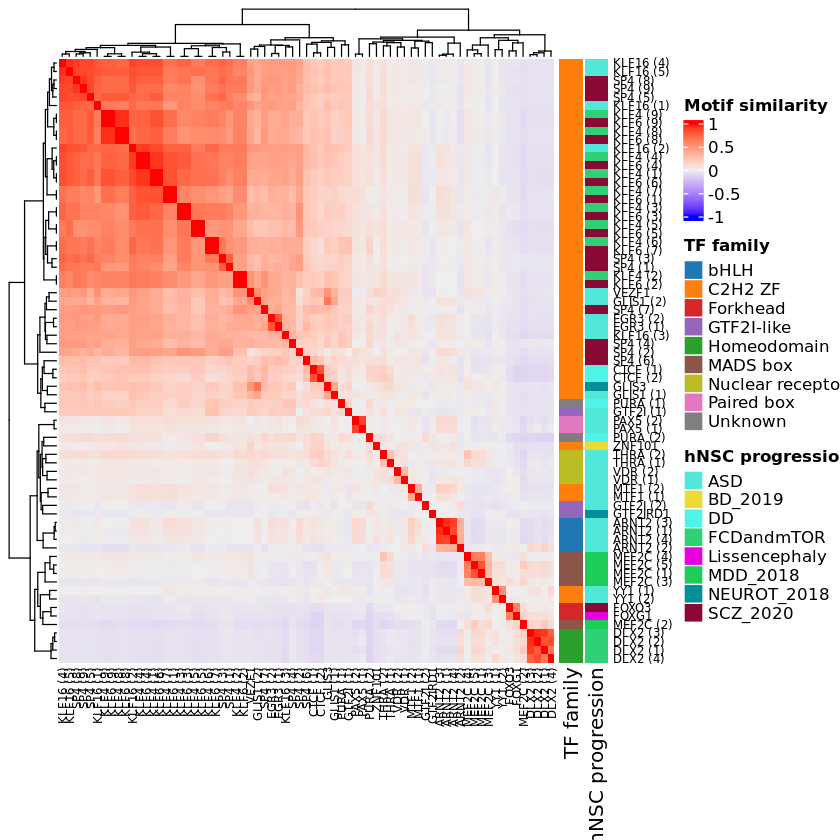

In [50]:
all.plot <- motifSimPlot(genes=unique(regulons$Core))
all.plot
all.n <- length(unique(regulons$Core))

### For developmental

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.
Warning message:
“The input is a data frame-like object, convert it to a matrix.”


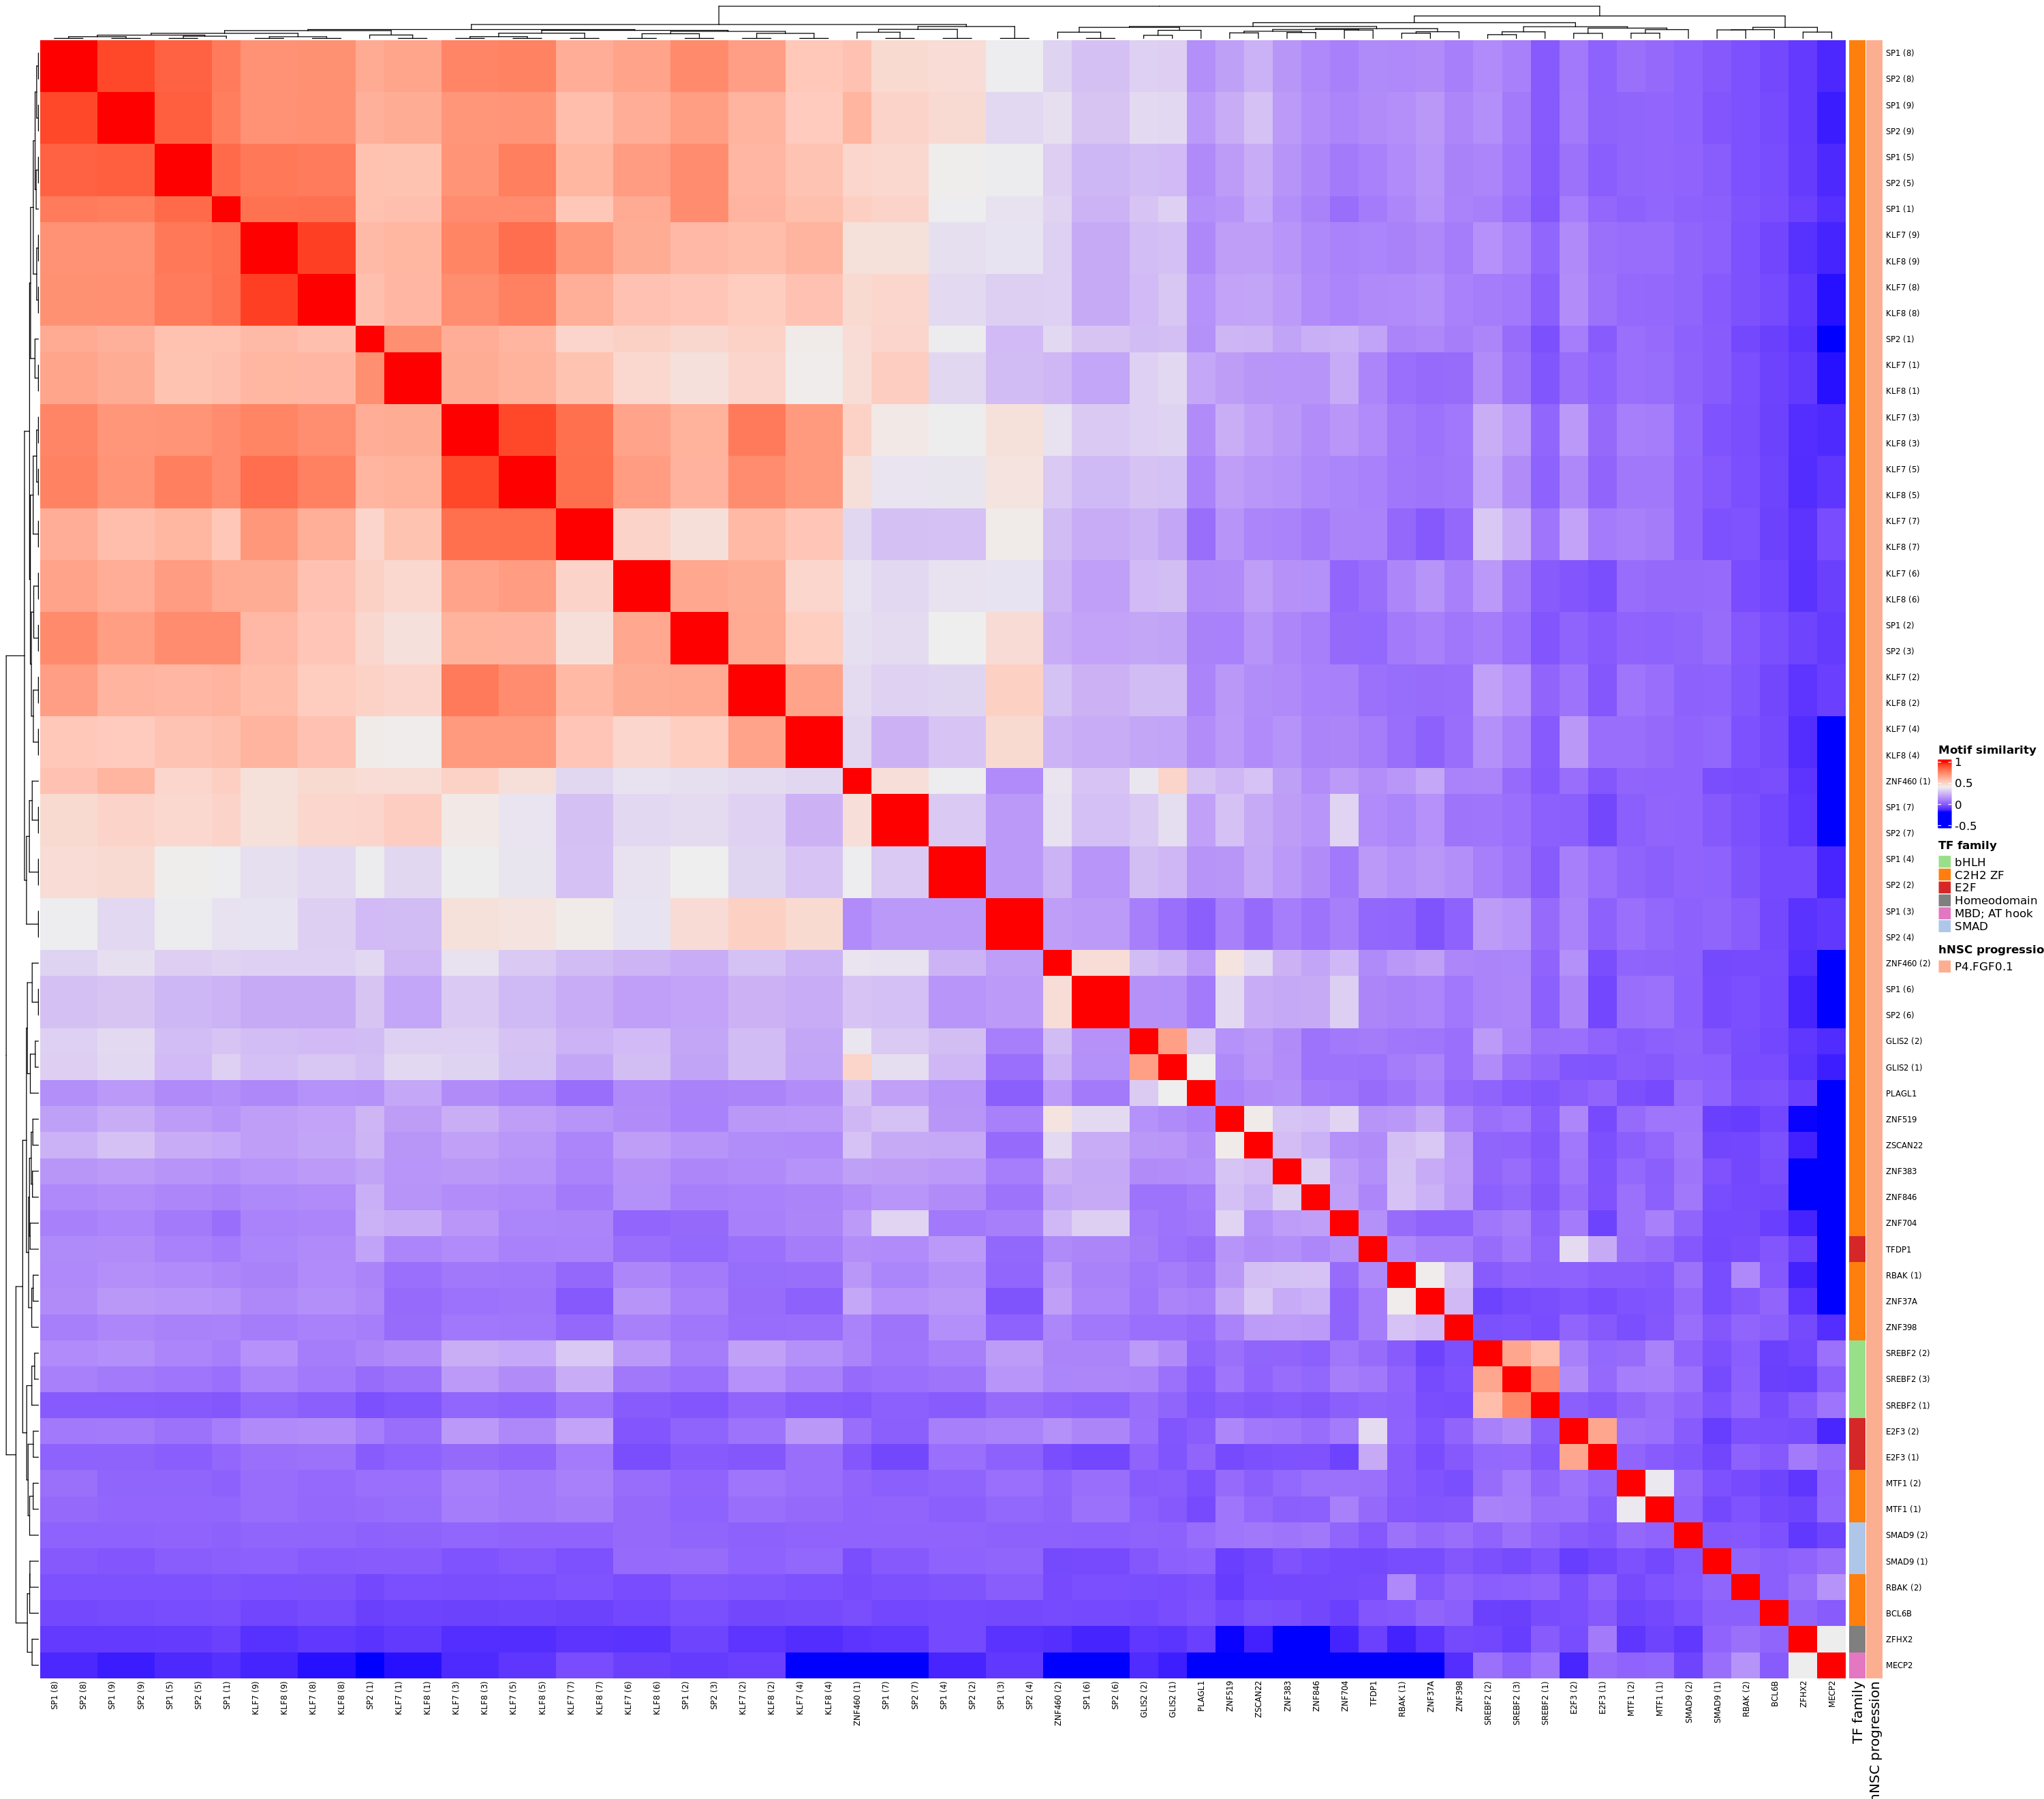

In [169]:
figsize(25,22)
p4fgf01.plot <- motifSimPlot(genes=unique(subset(regulons, geneSet=='P4.FGF0.1')$Core))
p4fgf01.plot
p4fgf01.n <- length(unique(subset(regulons, geneSet=='P4.FGF0.1')$Core))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.
Warning message:
“The input is a data frame-like object, convert it to a matrix.”


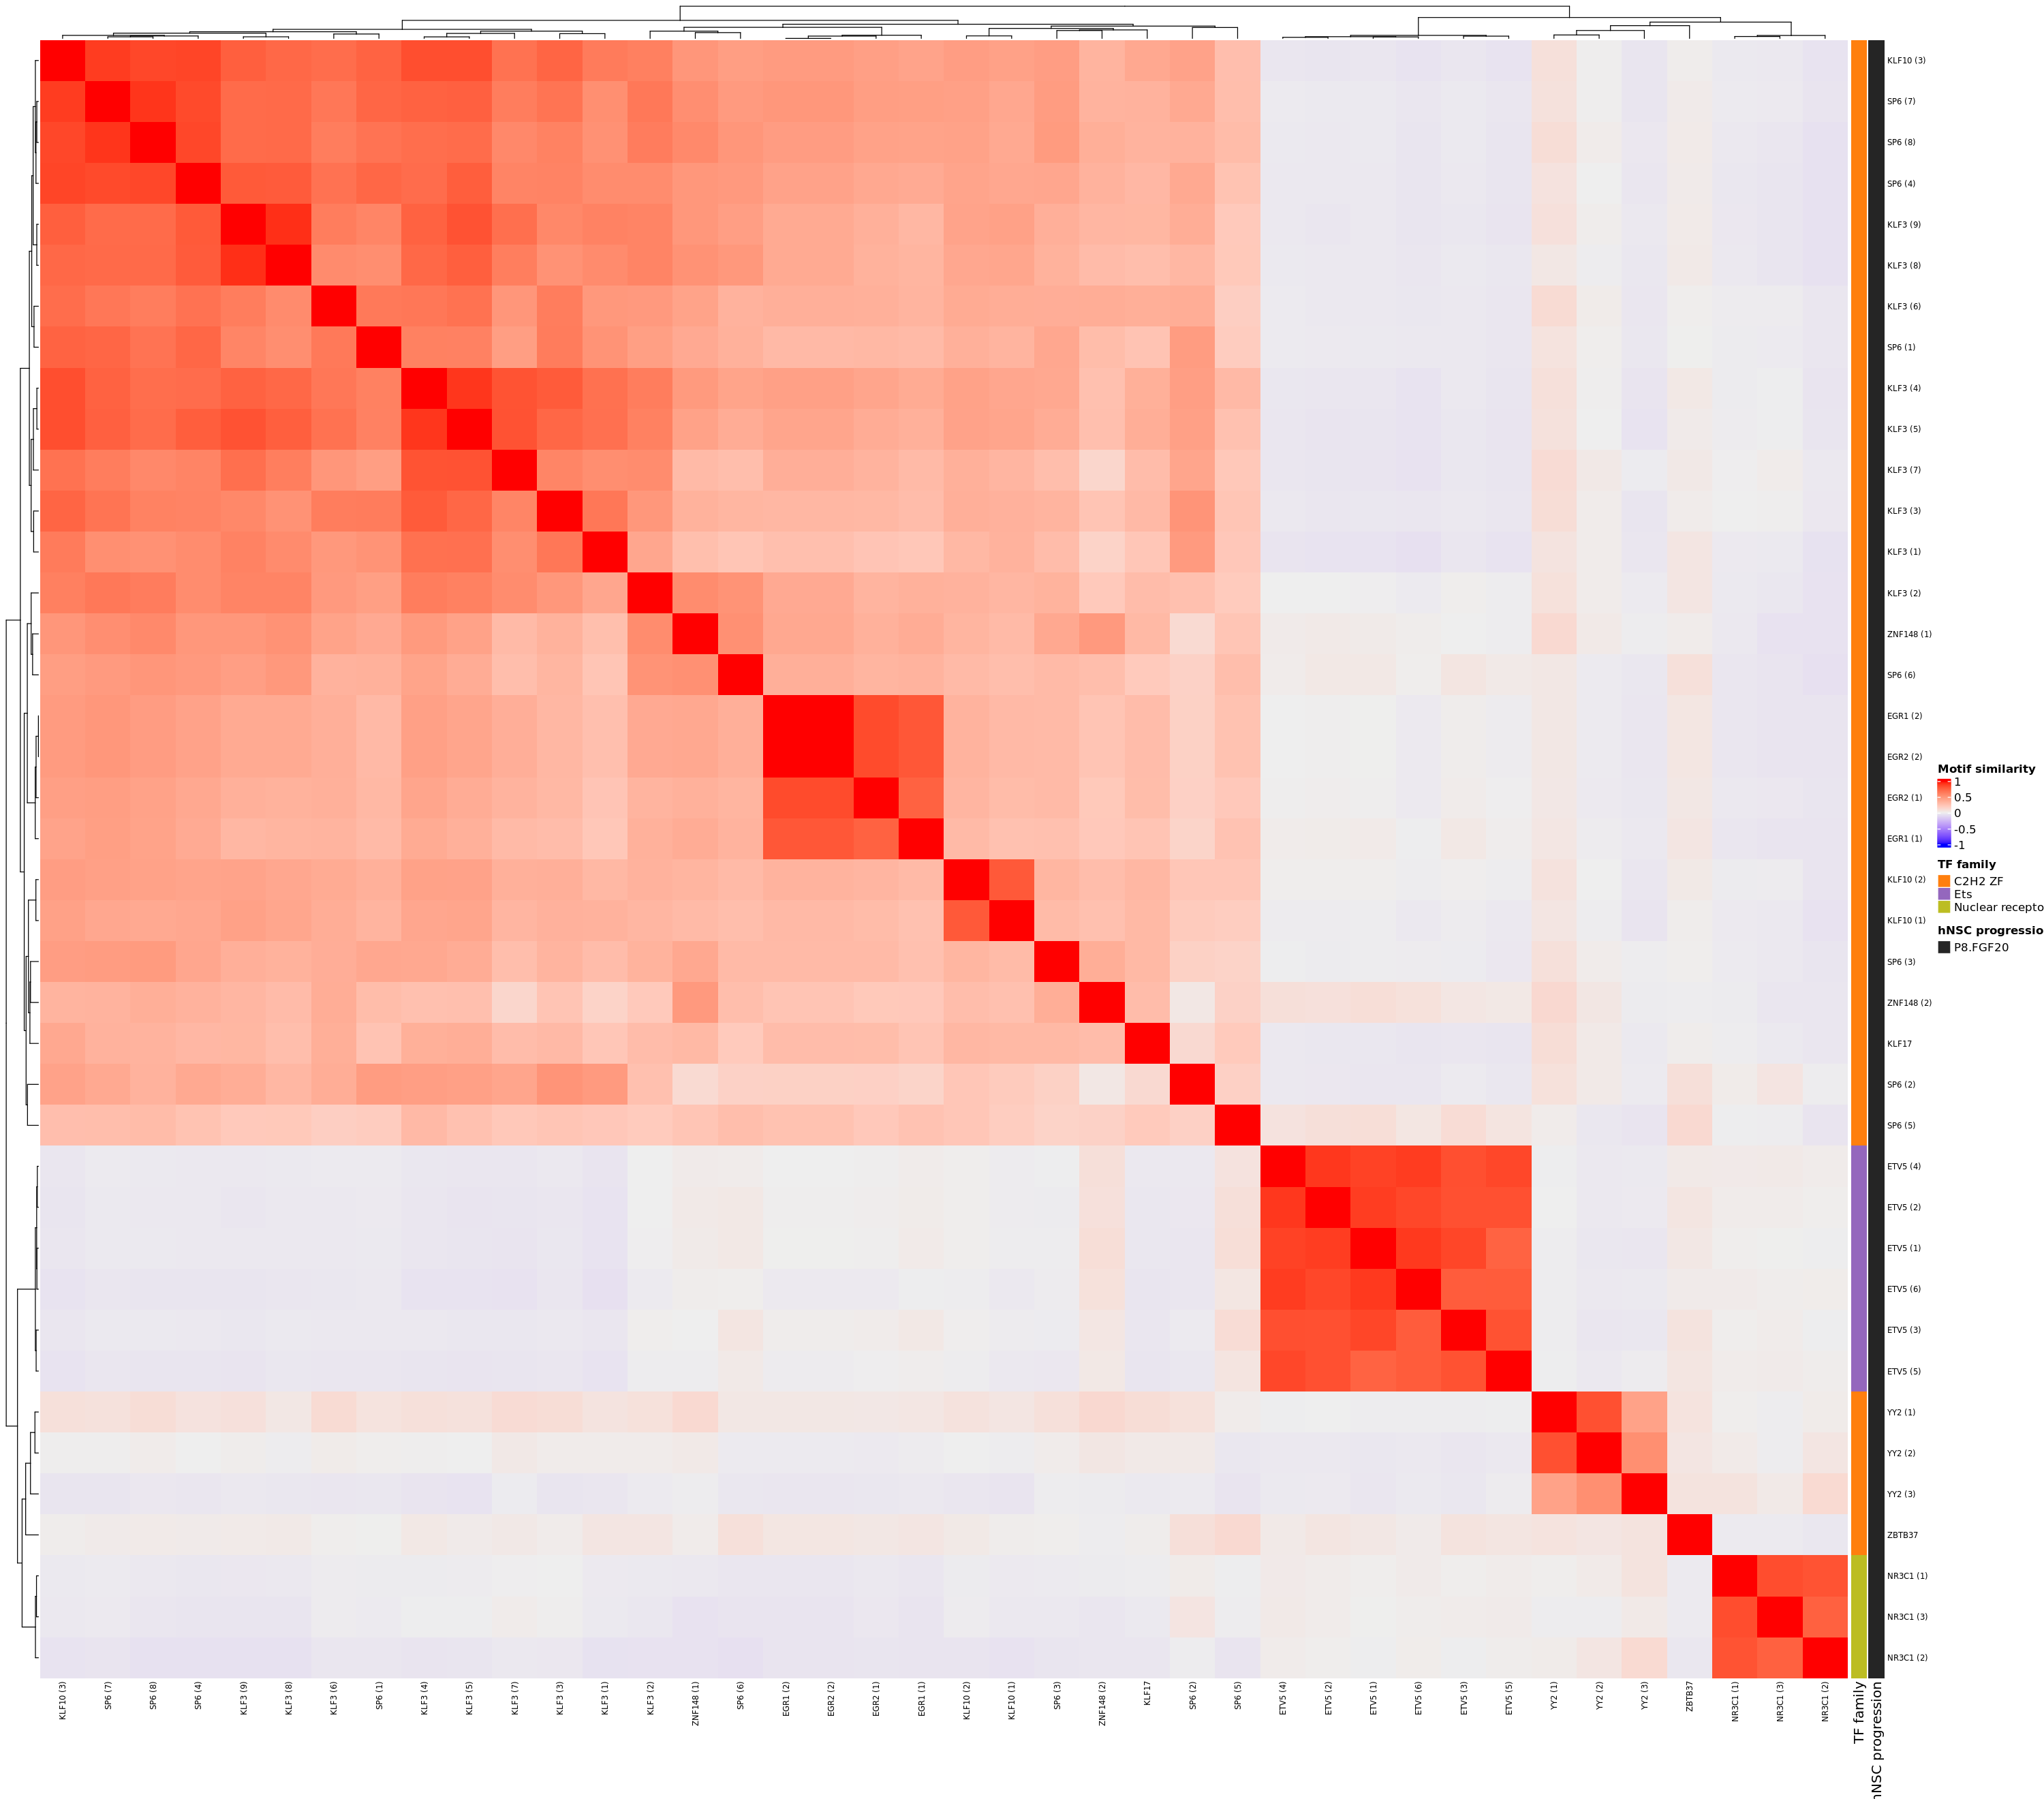

In [170]:
figsize(25,22)
p8fgf20.plot <- motifSimPlot(genes=unique(subset(regulons, geneSet=='P8.FGF20')$Core))
p8fgf20.plot
p8fgf20.n <- length(unique(subset(regulons, geneSet=='P8.FGF20')$Core))

In [171]:
c(p4fgf01.n, p8fgf20.n)/10+0.5

[1] 3.8 1.6

Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


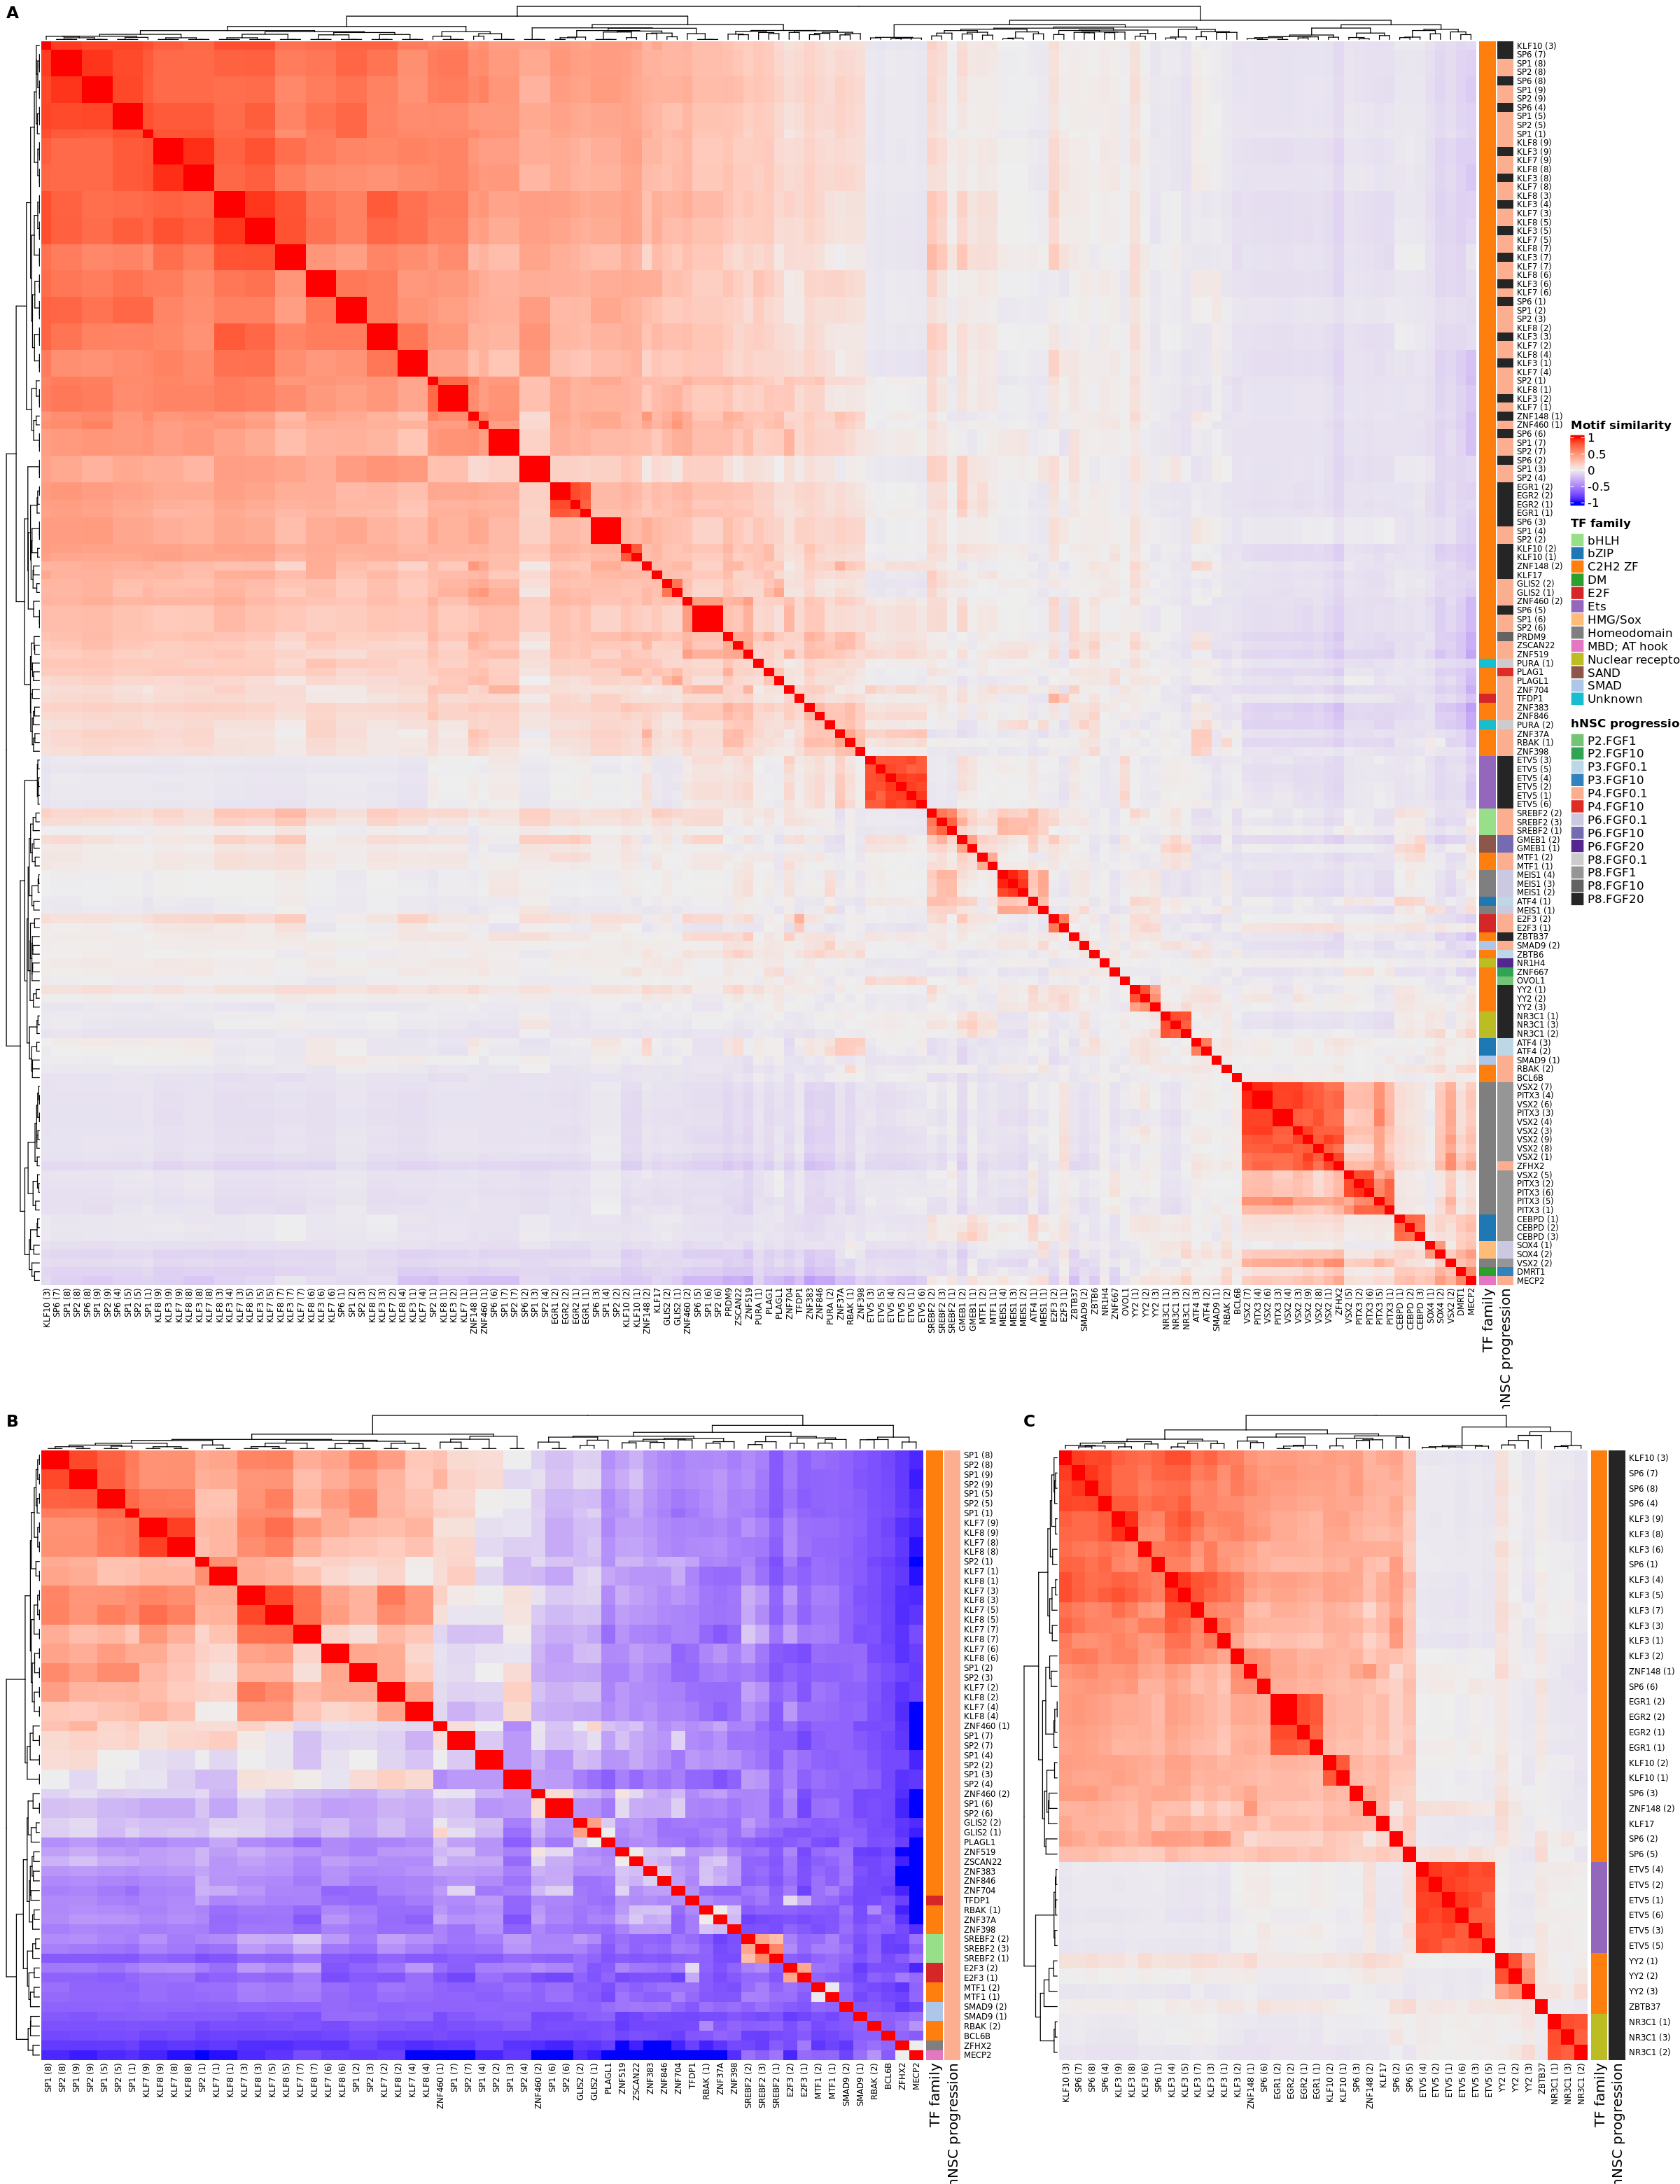

In [183]:
figsize(20,26)
p1 <- grid::grid.grabExpr(draw(all.plot, heatmap_legend_side = "right", annotation_legend_side = "right"))
p2 <- grid::grid.grabExpr(draw(p4fgf01.plot, show_heatmap_legend = FALSE))
p3 <- grid::grid.grabExpr(draw(p8fgf20.plot, show_heatmap_legend = FALSE))

comb.heatmap <- cowplot::plot_grid(
    
    p1, cowplot::plot_grid(
        p2, p3, 
        rel_widths = c(p4fgf01.n, p8fgf20.n)/10+3, 
        align='h', axis='tb', nrow = 1, labels=c('B', 'C')),
    
    rel_heights=c(all.n, max(p4fgf01.n, p8fgf20.n)), 
    nrow = 2, align='v', axis='lr',
    labels=c('A', NA)
)
comb.heatmap

In [184]:
pdf('results/RCT_peaks/plots/Combined.motifSimilarity.pdf', width=17, height=24, useDingbats = F)
plot(comb.heatmap)
dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


png 
  2

In [189]:
write.csv(simplot.mat, 'results/RCT_peaks/motifSimilarityData.csv', row.names=T)

### Disease regulons


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.


# A tibble: 71 × 7
# Groups:   Core [23]
   Core  geneSet    motif        motifIdx GeneMotif           GeneIdx   family  
   <chr> <chr>      <chr>        <chr>    <chr>               <chr>     <chr>   
 1 ARNT2 ASD        M08469_1.94d 1        ARNT2__M08469_1.94d ARNT2 (1) bHLH    
 2 ARNT2 ASD        M00226_1.94d 2        ARNT2__M00226_1.94d ARNT2 (2) bHLH    
 3 ARNT2 ASD        M08470_1.94d 3        ARNT2__M08470_1.94d ARNT2 (3) bHLH    
 4 ARNT2 ASD        M00267_1.94d 4        ARNT2__M00267_1.94d ARNT2 (4) bHLH    
 5 CTCF  DD         M10351_1.94d 1        CTCF__M10351_1.94d  CTCF (1)  C2H2 ZF 
 6 CTCF  DD         M05451_1.94d 2        CTCF__M05451_1.94d  CTCF (2)  C2H2 ZF 
 7 DLX2  FCDandmTOR M08560_1.94d 1        DLX2__M08560_1.94d  DLX2 (1)  Homeodo…
 8 DLX2  FCDandmTOR M08556_1.94d 2        DLX2__M08556_1.94d  DLX2 (2)  Homeodo…
 9 DLX2  FCDandmTOR M08569_1.94d 3        DLX2__M08569_1.94d  DLX2 (3)  Homeodo…
10 DLX2  FCDandmTOR M08570_1.94d 4        DLX2__M08570_1.94d  DLX2 (

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


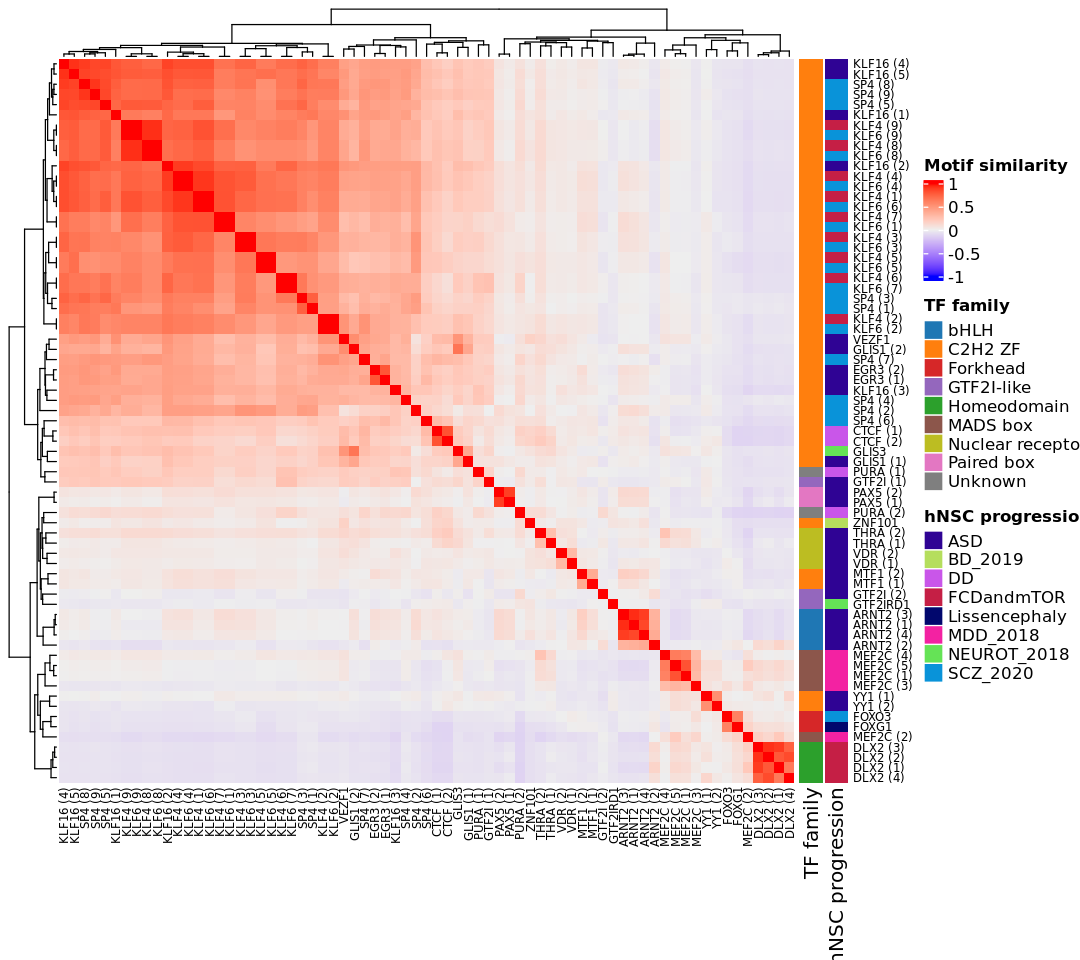

In [58]:
figsize(9,8)
all.plot <- motifSimPlot(genes=unique(regulons$Core))
all.plot
all.n <- length(unique(regulons$Core))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.


# A tibble: 26 × 7
# Groups:   Core [11]
   Core  geneSet motif        motifIdx GeneMotif           GeneIdx   family    
   <chr> <chr>   <chr>        <chr>    <chr>               <chr>     <chr>     
 1 ARNT2 ASD     M08469_1.94d 1        ARNT2__M08469_1.94d ARNT2 (1) bHLH      
 2 ARNT2 ASD     M00226_1.94d 2        ARNT2__M00226_1.94d ARNT2 (2) bHLH      
 3 ARNT2 ASD     M08470_1.94d 3        ARNT2__M08470_1.94d ARNT2 (3) bHLH      
 4 ARNT2 ASD     M00267_1.94d 4        ARNT2__M00267_1.94d ARNT2 (4) bHLH      
 5 EGR3  ASD     M05644_1.94d 1        EGR3__M05644_1.94d  EGR3 (1)  C2H2 ZF   
 6 EGR3  ASD     M08604_1.94d 2        EGR3__M08604_1.94d  EGR3 (2)  C2H2 ZF   
 7 GLIS1 ASD     M05765_1.94d 1        GLIS1__M05765_1.94d GLIS1 (1) C2H2 ZF   
 8 GLIS1 ASD     M08729_1.94d 2        GLIS1__M08729_1.94d GLIS1 (2) C2H2 ZF   
 9 GTF2I ASD     M04892_1.94d 1        GTF2I__M04892_1.94d GTF2I (1) GTF2I-like
10 GTF2I ASD     M04891_1.94d 2        GTF2I__M04891_1.94d GTF2I (2) GTF2I-like

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


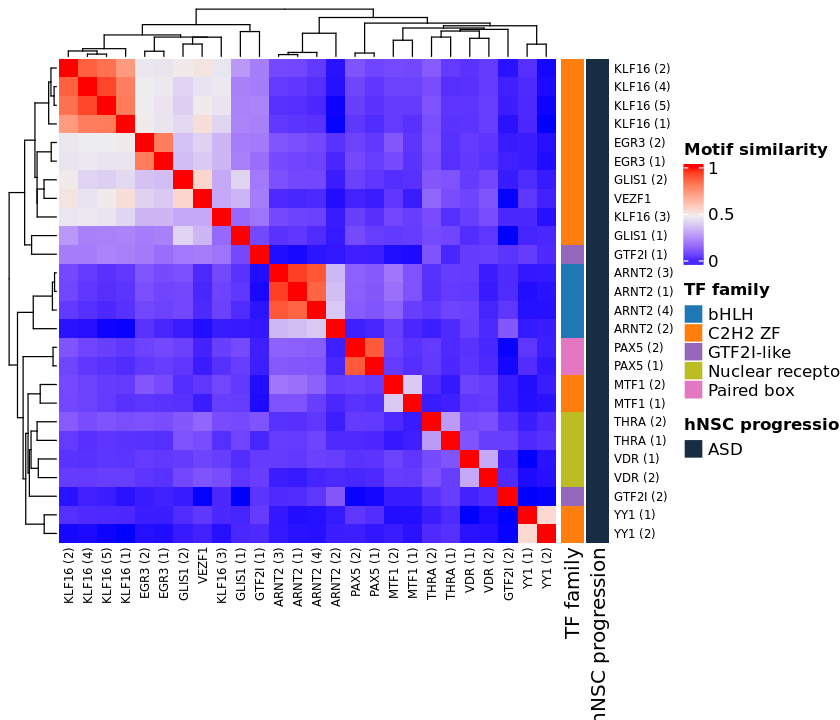

In [56]:
figsize(7,6)
ASD.plot <- motifSimPlot(genes=unique(subset(regulons, geneSet=='ASD')$Core))
ASD.plot
ASD.n <- length(unique(subset(regulons, geneSet=='ASD')$Core))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.
Warning message:
“The input is a data frame-like object, convert it to a matrix.”


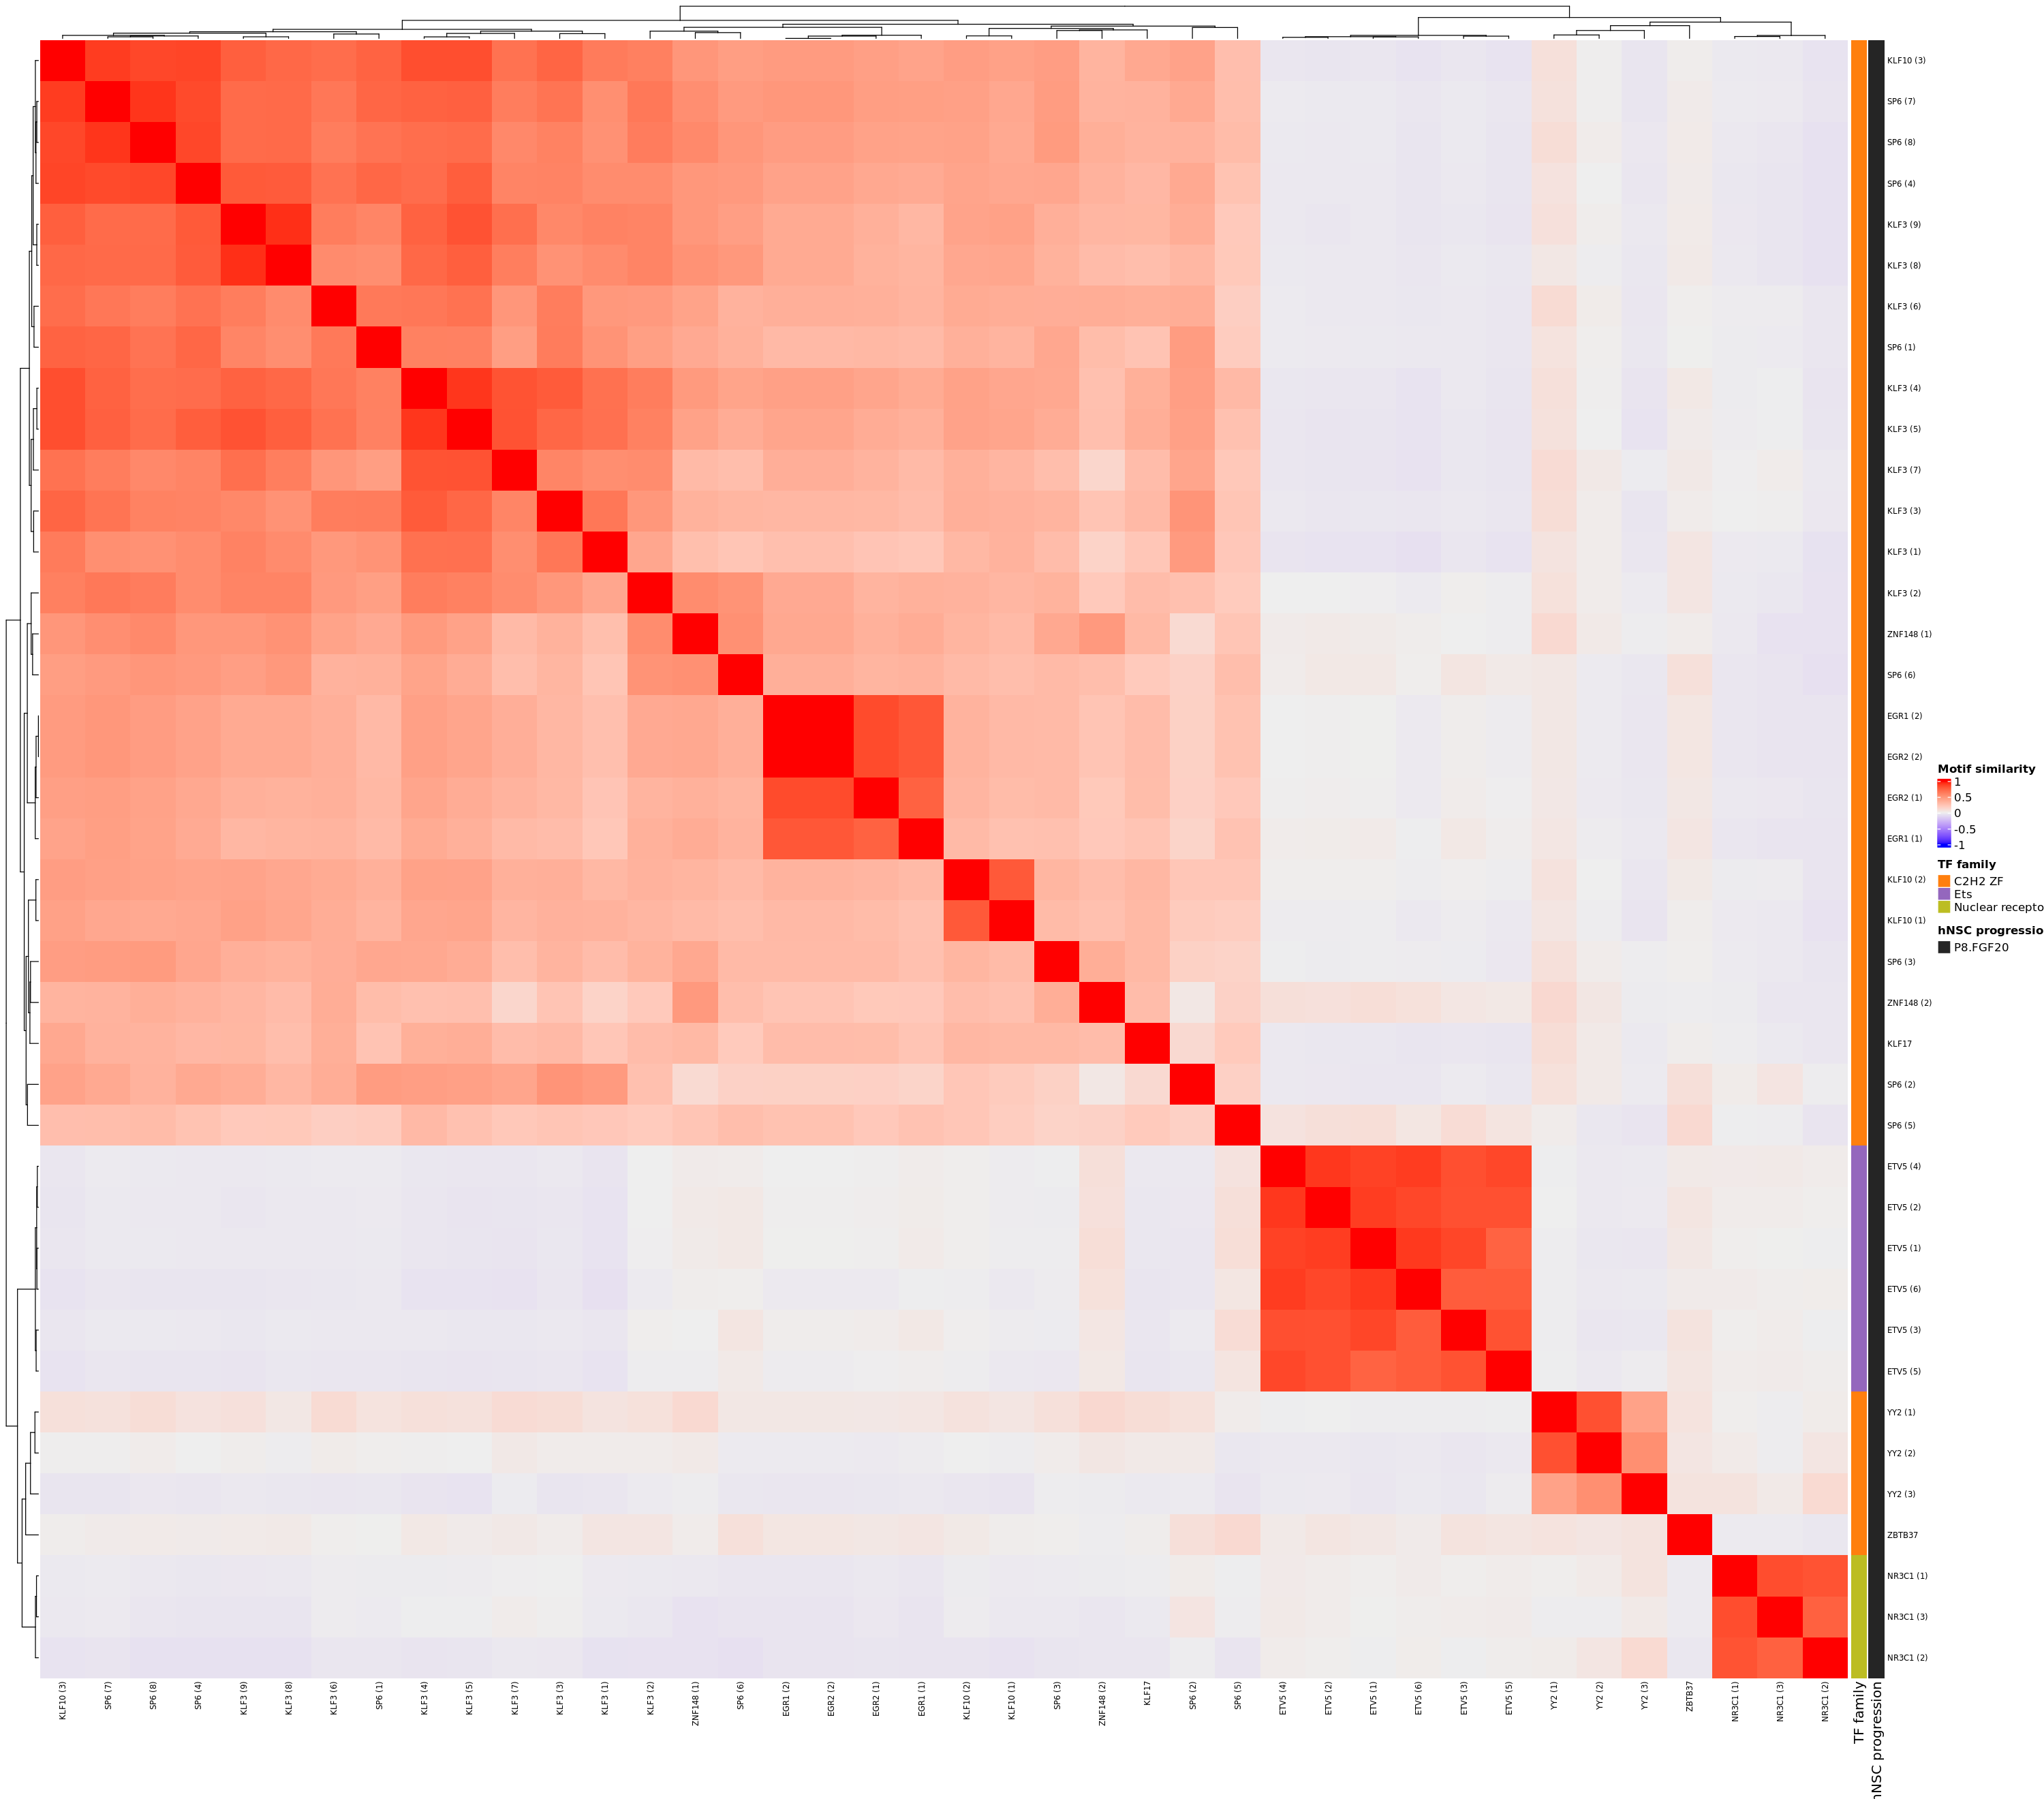

In [170]:
figsize(25,22)
p8fgf20.plot <- motifSimPlot(genes=unique(subset(regulons, geneSet=='P8.FGF20')$Core))
p8fgf20.plot
p8fgf20.n <- length(unique(subset(regulons, geneSet=='P8.FGF20')$Core))